# Caricamento dataset

In [6]:
import json
import pandas as pd
import re
import string

file_path = 'Dataset/DiverseVul_code_confronto.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Split dataset

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Dividere le caratteristiche (X) e il target (y)
X = df['func']
y = df['target']

# Creazione del campionatore
rus = RandomUnderSampler(random_state=42)

# Applicare il campionatore solo ai dati di addestramento
X_train_resampled, y_train_resampled = rus.fit_resample(X.values.reshape(-1, 1), y)

# Suddividere il dataset originale in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

# Convertire i dati resampled back in un formato pandas series
X_train = pd.Series(X_train.flatten())
X_test = pd.Series(X_test.flatten())

print(len(X_train))
print(len(X_test))
#Creazione del pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Trasformazione del testo in feature
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
])

17008
4252


# Training

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

# Valutazione

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      2126
           1       0.74      0.56      0.64      2126

    accuracy                           0.68      4252
   macro avg       0.69      0.68      0.68      4252
weighted avg       0.69      0.68      0.68      4252

Accuracy: 0.6822671683913453


# Matrice

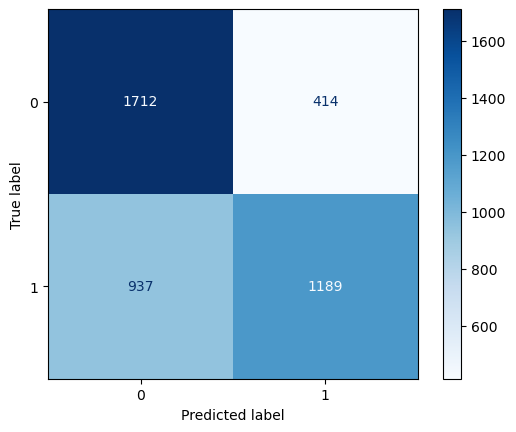

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()